# Proposal should include the following sections:
* ## Title
* ## Introduction:
  * Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
  * Clearly state the question you will try to answer with your project
  * Identify and describe the dataset that will be used to answer the question
* ## Preliminary exploratory data analysis:
  * Demonstrate that the dataset can be read from the web into R 
  * Clean and wrangle your data into a tidy format
  * Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
  * Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.
* ## Methods:
  * Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
  * Describe at least one way that you will visualize the results
* ## Expected outcomes and significance:
  * What do you expect to find?
  * What impact could such findings have?
  * What future questions could this lead to?


# Rough Work beyond This

In [1]:
library(tidyverse)
library(ggplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: Error in library(ggplot): there is no package called ‘ggplot’


In [4]:
adult_data <- read_csv("data/adult_training.csv",
                      col_names = c("age",
                                   "workclass",
                                   "fnlwgt",
                                   "education",
                                   "education_num",
                                   "marital_status"))
head(adult_data)

Rows: 32560 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): State-gov, Bachelors, Never-married, Adm-clerical, Not-in-family, W...
dbl (6): 39, 77516, 13, 2174, 0, 40

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [7]:
str(adult_data)
#=========================
adult_data <- adult_data |>
                  
#                 # filter(company %in% list("Oracle","eBay","Amazon","Apple","Google"))
#                 group_by(company) |>
#                 summarize(count = n()) |>
#                 arrange(desc(count))
# salary_data
#=========================


spec_tbl_df [32,560 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ 39           : num [1:32560] 50 38 53 28 37 49 52 31 42 37 ...
 $ State-gov    : chr [1:32560] "Self-emp-not-inc" "Private" "Private" "Private" ...
 $ 77516        : num [1:32560] 83311 215646 234721 338409 284582 ...
 $ Bachelors    : chr [1:32560] "Bachelors" "HS-grad" "11th" "Bachelors" ...
 $ 13           : num [1:32560] 13 9 7 13 14 5 9 14 13 10 ...
 $ Never-married: chr [1:32560] "Married-civ-spouse" "Divorced" "Married-civ-spouse" "Married-civ-spouse" ...
 $ Adm-clerical : chr [1:32560] "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" "Prof-specialty" ...
 $ Not-in-family: chr [1:32560] "Husband" "Not-in-family" "Husband" "Wife" ...
 $ White        : chr [1:32560] "White" "White" "Black" "Black" ...
 $ Male         : chr [1:32560] "Male" "Male" "Male" "Female" ...
 $ 2174         : num [1:32560] 0 0 0 0 0 ...
 $ 0            : num [1:32560] 0 0 0 0 0 0 0 0 0 0 ...
 $ 40           : num [1:32560] 13 40 

# Education Level based on Base Salary and Bonus

In [4]:
salary_data_mod_1_base <- salary_data |>
                filter(! is.na(Education)) |>
                mutate(Education = as.factor(Education))

group_by(salary_data_mod_1_base, Education) |>
    summarize(count = n())
# head(salary_data_mod_1_base)

Education,count
<fct>,<int>
Bachelor's Degree,12601
Highschool,320
Master's Degree,15391
PhD,1703
Some College,355


### Dataset distribution
Since we have very few datapoints for
* Highschool
* PhD
* Some College

We will filter out these observations

Education,count
<fct>,<int>
Bachelor's Degree,12601
Master's Degree,15391


timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,⋯,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
3/18/2019 10:03:34,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0,0,Distributed Systems (Back-End),142000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree
6/15/2019 8:24:43,ExxonMobil,23,Software Engineer,105000,"Houston, TX",2,0,ML / AI,105000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 16:04:25,Zillow,P4,Software Engineer,242000,"San Francisco, CA",8,1,Android,187000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 17:40:50,Amazon,L4,Software Engineer,172000,"Seattle, WA",5,0,Distributed Systems (Back-End),135000,⋯,1,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 18:43:36,Zillow,P3,Software Engineer,255000,"Seattle, WA",5,0,ML / AI,165000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 20:40:02,Amazon,L4,Software Engineer,144000,"Seattle, WA",0,0,Full Stack,112000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree


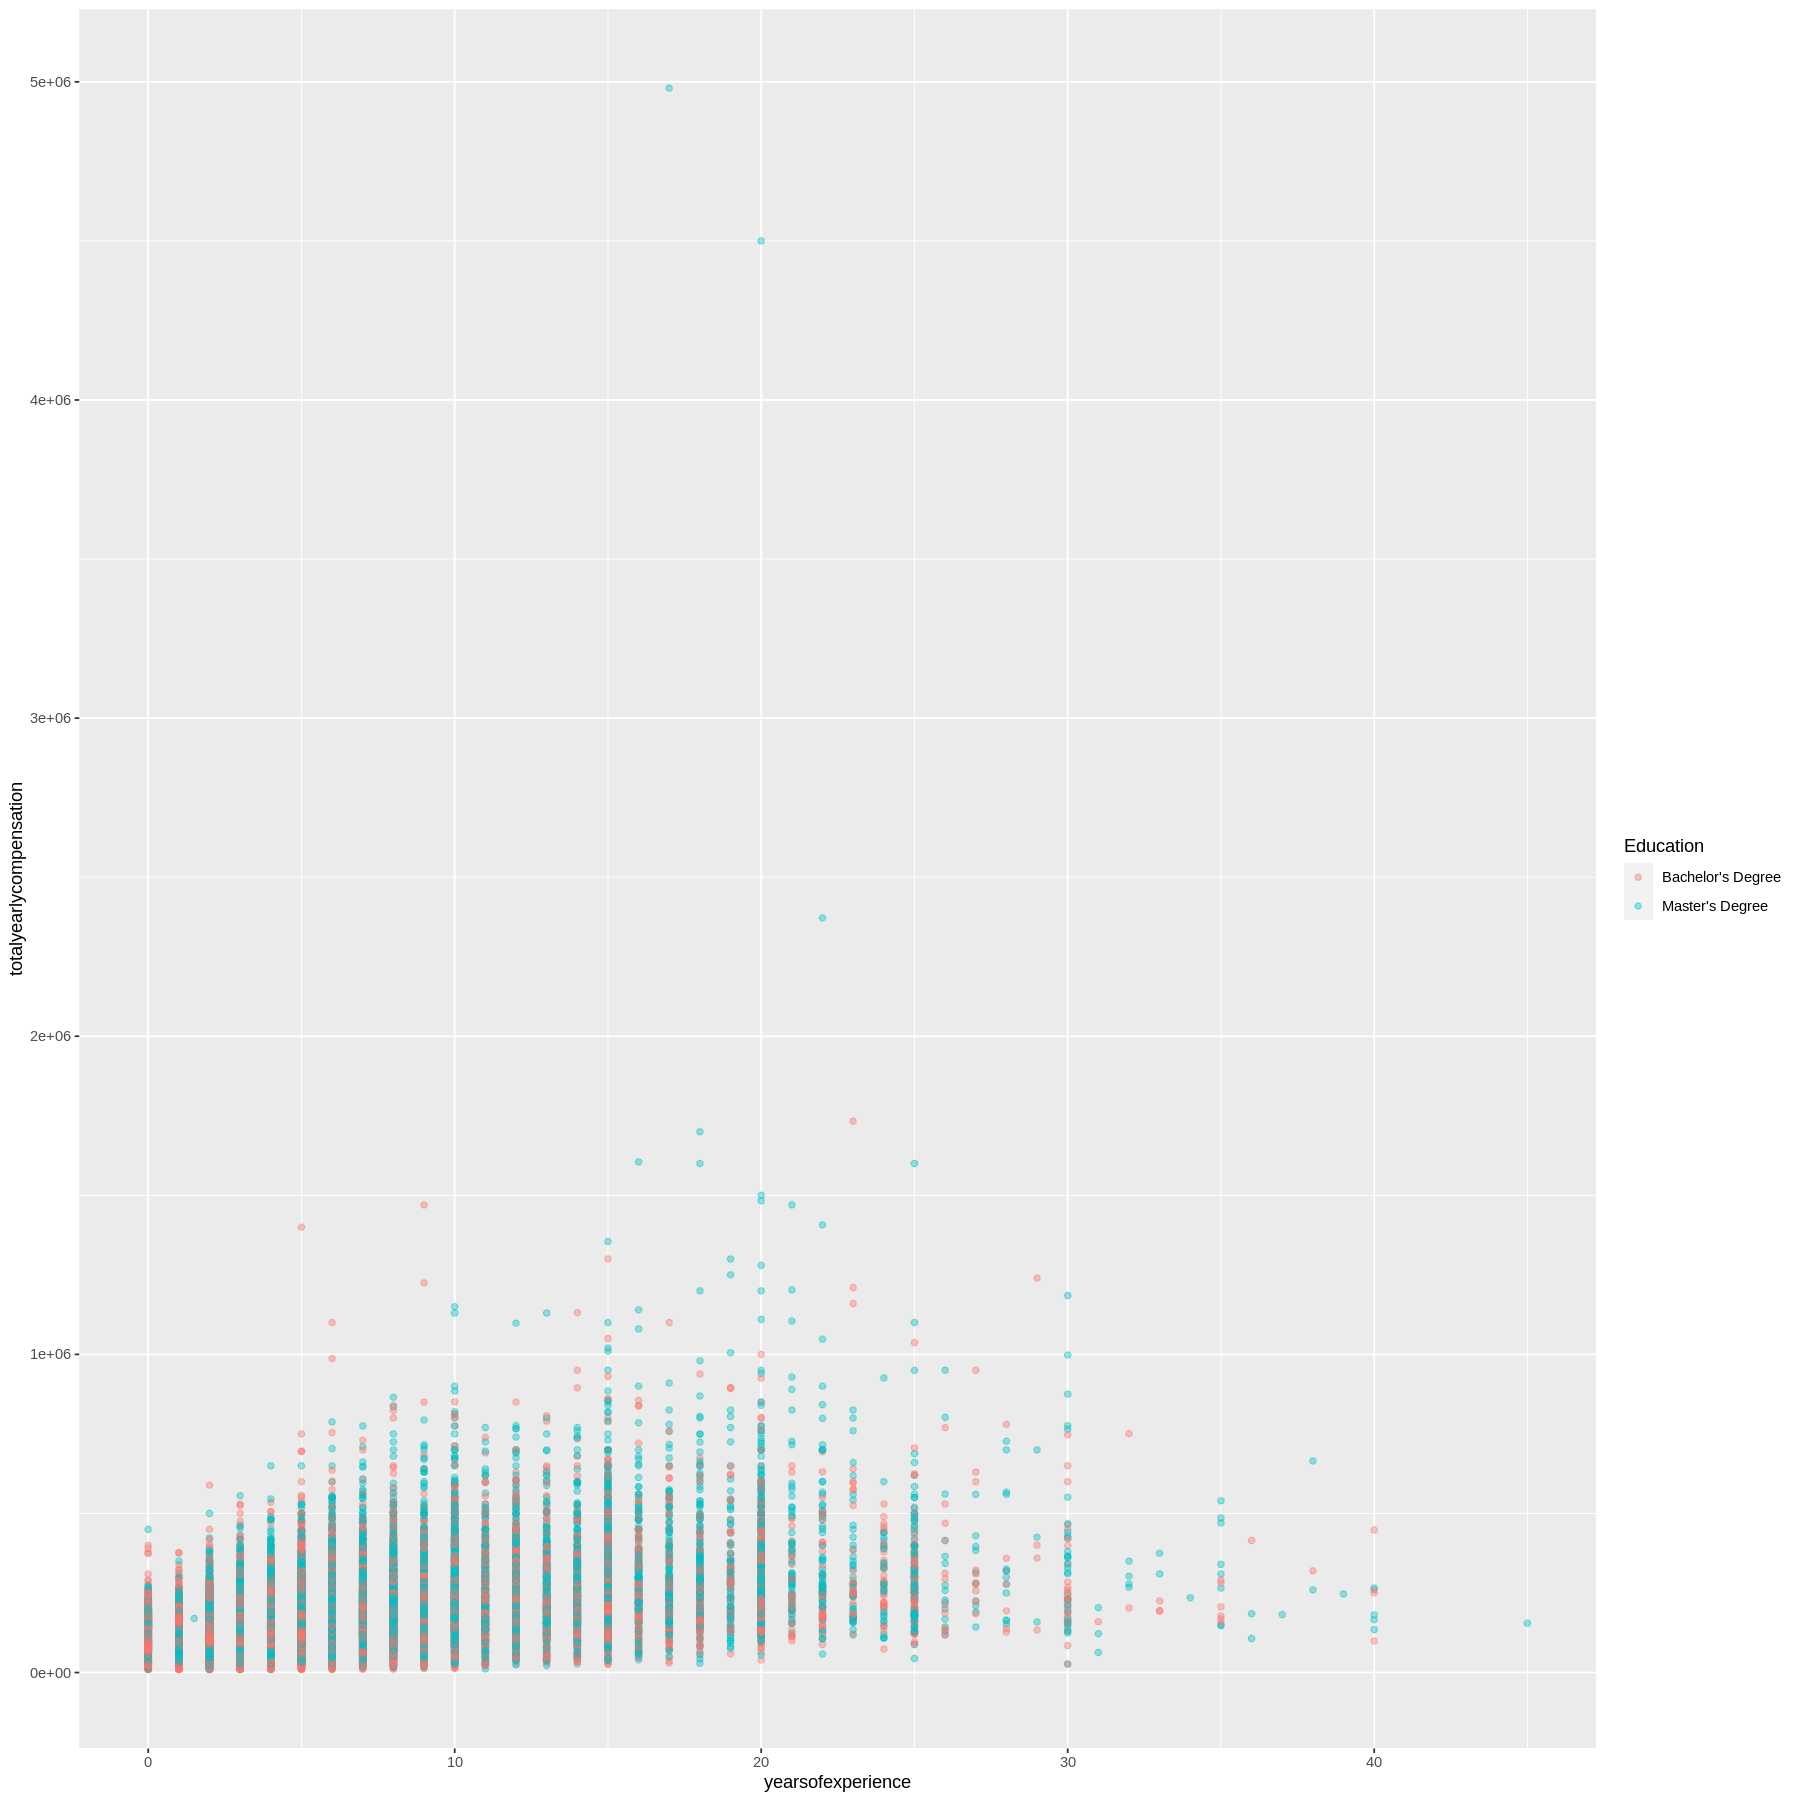

In [23]:
salary_data_mod_1_filtered <- salary_data_mod_1_base |>
                                filter(Education %in% list("Bachelor's Degree","Master's Degree")) 
                                # filter(bonus != 0, stockgrantvalue != 0)

group_by(salary_data_mod_1_filtered, Education) |>
    summarize(count = n())

options(repr.plot.width = 15, repr.plot.height= 15)
salary_data_mod_1_plot <- ggplot(salary_data_mod_1_filtered, aes(x=yearsofexperience,y=totalyearlycompensation,color=Education)) +
                                geom_point(alpha=0.4)

head(salary_data_mod_1_filtered)
salary_data_mod_1_plot

Education,count
<fct>,<int>
Bachelor's Degree,6627
Master's Degree,9727


timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,⋯,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
10/29/2019 16:04:25,Zillow,P4,Software Engineer,242000,"San Francisco, CA",8,1,Android,187000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 17:40:50,Amazon,L4,Software Engineer,172000,"Seattle, WA",5,0,Distributed Systems (Back-End),135000,⋯,1,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 18:43:36,Zillow,P3,Software Engineer,255000,"Seattle, WA",5,0,ML / AI,165000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 20:40:02,Amazon,L4,Software Engineer,144000,"Seattle, WA",0,0,Full Stack,112000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 21:07:59,Google,L6,Software Engineer,515000,"Sunnyvale, CA",15,0,Security,220000,⋯,1,0,0,0,0,0,0,0,NA,Master's Degree
10/29/2019 21:48:43,Cisco,Software Engineer III,Software Engineer,169000,"Milpitas, CA",5,5,Networking,132000,⋯,0,0,0,0,0,0,0,0,NA,Master's Degree


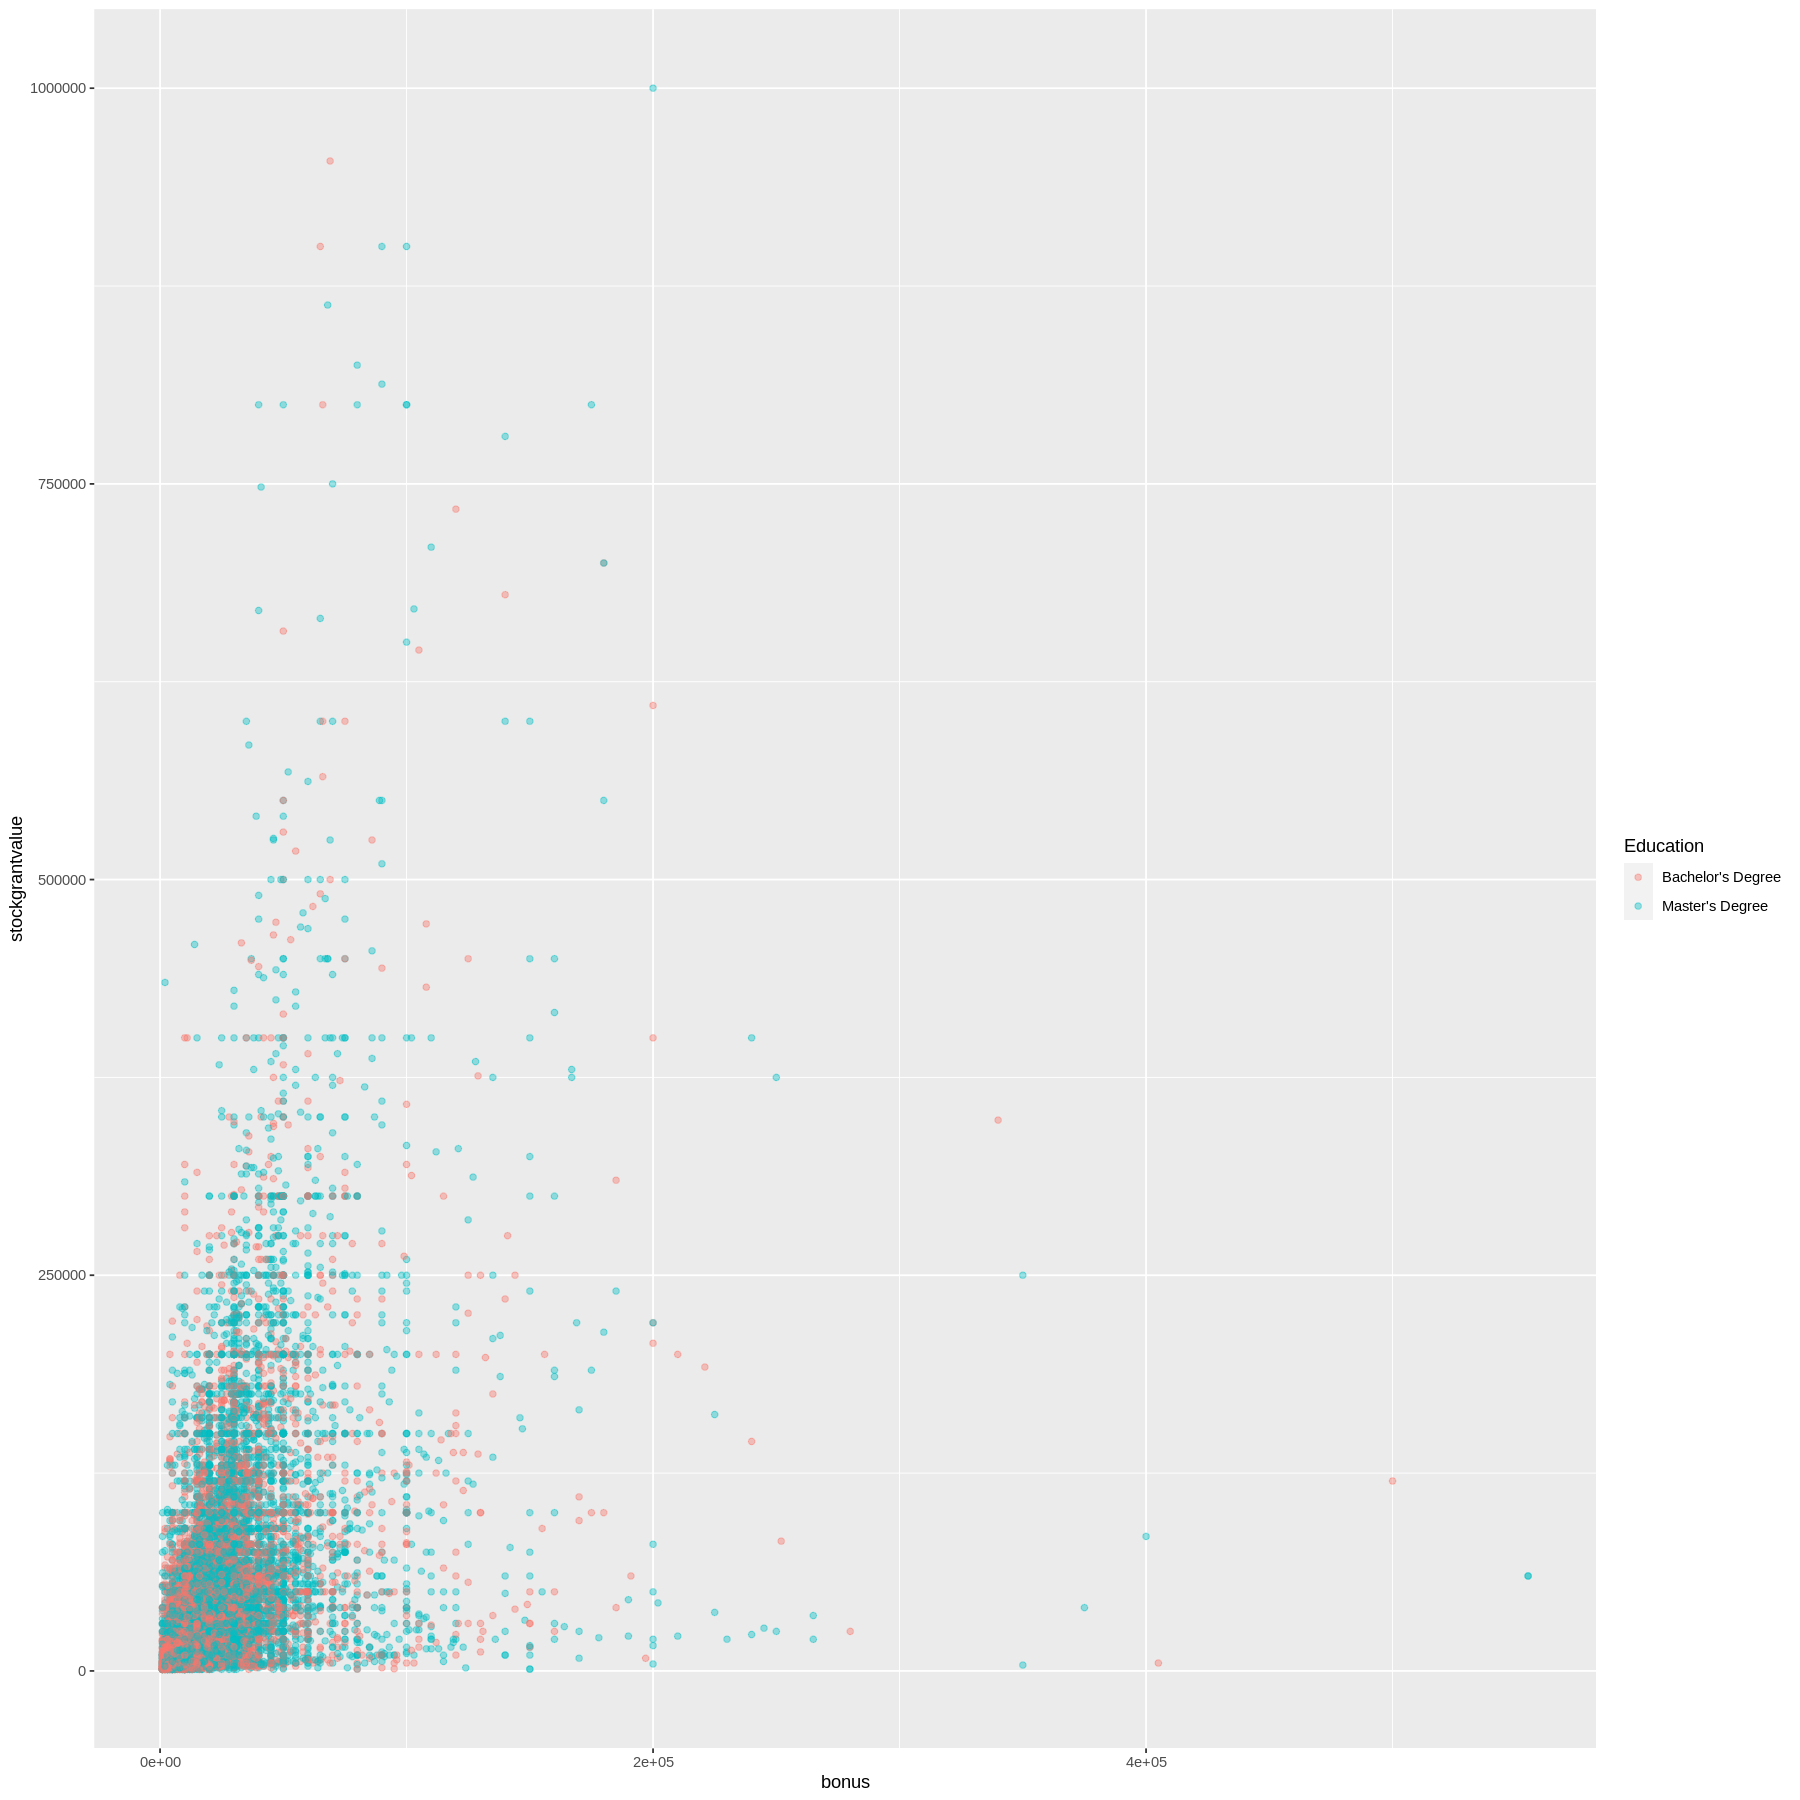

In [24]:
salary_data_mod_2_filtered <- salary_data_mod_1_base |>
                                filter(Education %in% list("Bachelor's Degree","Master's Degree")) |>
                                filter(bonus != 0, stockgrantvalue != 0)

group_by(salary_data_mod_2_filtered, Education) |>
    summarize(count = n())

options(repr.plot.width = 15, repr.plot.height=15)
salary_data_mod_2_plot <- ggplot(salary_data_mod_2_filtered, aes(x=bonus,y=stockgrantvalue,color=Education)) +
                                geom_point(alpha=0.4)

head(salary_data_mod_2_filtered)
salary_data_mod_2_plot